In [191]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [192]:
data=pd.read_csv("h1n1_vaccine_prediction.csv")

In [193]:
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [195]:
data.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [196]:
data.duplicated().sum()

0

<Axes: xlabel='qualification', ylabel='count'>

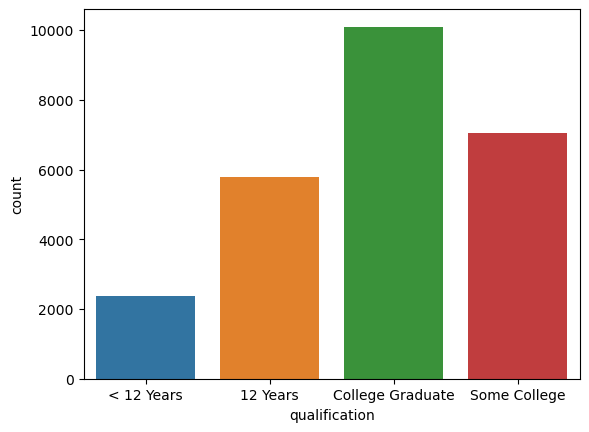

In [197]:
sns.countplot(x="qualification",data=data)

In [198]:
data.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

<Axes: xlabel='unique_id'>

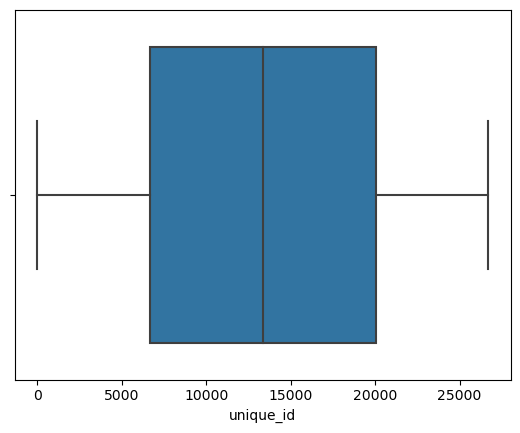

In [199]:
sns.boxplot(x="unique_id",data=data)

In [200]:
data.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

<Axes: xlabel='age_bracket', ylabel='count'>

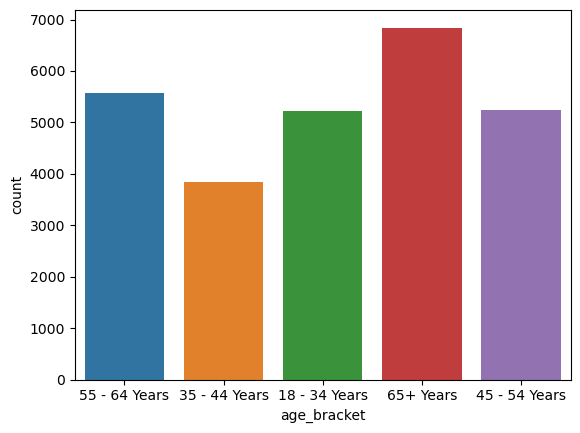

In [201]:
sns.countplot(x="age_bracket",data=data)

<Axes: >

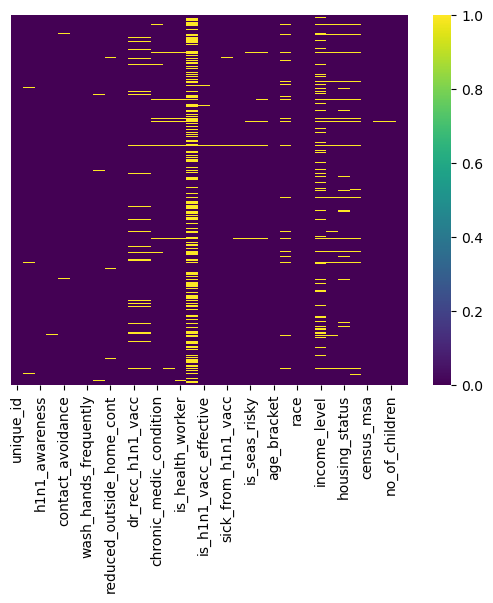

In [202]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

In [203]:
data.drop(['unique_id'],axis=1,inplace=True)
data.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [204]:
median1=data["h1n1_worry"].median()
median1

2.0

In [205]:
data["h1n1_worry"]=data["h1n1_worry"].replace(np.nan,median1)

In [206]:
median2=data["h1n1_awareness"].mean()
median2

1.2625324357865444

In [207]:
data["h1n1_awareness"]=data["h1n1_awareness"].replace(np.nan,median2)

In [208]:
median3=data["antiviral_medication"].mean()
median3

0.048843670220753865

In [209]:
data["antiviral_medication"]=data["antiviral_medication"].replace(np.nan,median3)

In [210]:
median4=data["contact_avoidance"].mean()
median4

0.7256122872561229

In [211]:
data["contact_avoidance"]=data["contact_avoidance"].replace(np.nan,median4)

In [212]:
median5=data["bought_face_mask"].mean()
median5

0.06898231414868106

In [213]:
data["bought_face_mask"]=data["bought_face_mask"].replace(np.nan,median5)

In [214]:
median6=data["wash_hands_frequently"].median()
median6

1.0

In [215]:
data["wash_hands_frequently"]=data["wash_hands_frequently"].replace(np.nan,median6)

In [216]:
median7=data["avoid_large_gatherings"].mean()
median7

0.3586401202103681

In [217]:
data["avoid_large_gatherings"]=data["avoid_large_gatherings"].replace(np.nan,median7)

In [218]:
median8=data["reduced_outside_home_cont"].mean()
median8

0.33731455399061033

In [219]:
data["reduced_outside_home_cont"]=data["reduced_outside_home_cont"].replace(np.nan,median8)

In [220]:
median9=data["avoid_touch_face"].median()
median9

1.0

In [221]:
data["avoid_touch_face"]=data["avoid_touch_face"].replace(np.nan,median9)

In [222]:
median10=data["dr_recc_h1n1_vacc"].mean()
median10

0.2203120544262028

In [223]:
data["dr_recc_h1n1_vacc"]=data["dr_recc_h1n1_vacc"].replace(np.nan,median10)

In [224]:
median11=data["dr_recc_seasonal_vacc"].mean()
median11

0.32973479447590337

In [225]:
data["dr_recc_seasonal_vacc"]=data["dr_recc_seasonal_vacc"].replace(np.nan,median11)

In [226]:
median12=data["chronic_medic_condition"].mean()
median12

0.28326080198943115

In [227]:
data["chronic_medic_condition"]=data["chronic_medic_condition"].replace(np.nan,median12)

In [228]:
median13=data["cont_child_undr_6_mnths"].mean()
median13

0.0825897168462935

In [229]:
data["cont_child_undr_6_mnths"]=data["cont_child_undr_6_mnths"].replace(np.nan,median13)

In [230]:
median14=data["is_health_worker"].mean()
median14

0.111917538509053

In [231]:
data["is_health_worker"]=data["is_health_worker"].replace(np.nan,median14)

In [232]:
median15=data["is_h1n1_vacc_effective"].mean()
median15

3.85062319501444

In [233]:
data["is_h1n1_vacc_effective"]=data["is_h1n1_vacc_effective"].replace(np.nan,median15)

In [234]:
median16=data["is_h1n1_risky"].mean()
median16

2.3425662069227555

In [235]:
data["is_h1n1_risky"]=data["is_h1n1_risky"].replace(np.nan,median16)

In [236]:
median17=data["sick_from_h1n1_vacc"].median()
median17

2.0

In [237]:
data["sick_from_h1n1_vacc"]=data["sick_from_h1n1_vacc"].replace(np.nan,median17)

In [238]:
mode1=data["qualification"].mode()[0]

In [239]:
data["qualification"]=data["qualification"].replace(np.nan,mode1)

In [240]:
mode2=data["income_level"].mode()[0]

In [241]:
data["income_level"]=data["income_level"].replace(np.nan,mode2)

In [242]:
mode3=data["marital_status"].mode()[0]

In [243]:
data["marital_status"]=data["marital_status"].replace(np.nan,mode3)

In [244]:
mode4=data["housing_status"].mode()[0]

In [245]:
data["housing_status"]=data["housing_status"].replace(np.nan,mode4)

In [246]:
mode5=data["employment"].mode()[0]

In [247]:
data["employment"]=data["employment"].replace(np.nan,mode5)

In [248]:
median18=data["no_of_adults"].mean()
median18

0.8864993574722201

In [249]:
data["no_of_adults"]=data["no_of_adults"].replace(np.nan,median18)

In [250]:
median19=data["no_of_children"].mean()
median19

0.5345831128581148

In [251]:
data["no_of_children"]=data["no_of_children"].replace(np.nan,median19)

In [252]:
median20=data["has_health_insur"].mean()
median20

0.8797200859142243

In [253]:
data["has_health_insur"]=data["has_health_insur"].replace(np.nan,median20)

In [254]:
data.dropna(inplace=True)

In [255]:
data.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [256]:
data=pd.get_dummies(data,columns=["age_bracket","qualification","race","sex","income_level","marital_status","housing_status","employment","census_msa"])

In [257]:
data.dtypes

h1n1_worry                                float64
h1n1_awareness                            float64
antiviral_medication                      float64
contact_avoidance                         float64
bought_face_mask                          float64
wash_hands_frequently                     float64
avoid_large_gatherings                    float64
reduced_outside_home_cont                 float64
avoid_touch_face                          float64
dr_recc_h1n1_vacc                         float64
dr_recc_seasonal_vacc                     float64
chronic_medic_condition                   float64
cont_child_undr_6_mnths                   float64
is_health_worker                          float64
has_health_insur                          float64
is_h1n1_vacc_effective                    float64
is_h1n1_risky                             float64
sick_from_h1n1_vacc                       float64
is_seas_vacc_effective                    float64
is_seas_risky                             float64


In [258]:
X=data.drop(['h1n1_vaccine'],axis=1)
Y=data[['h1n1_vaccine']]

In [259]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.30,random_state=1)

In [260]:
import warnings
warnings.filterwarnings("ignore")

In [261]:
model=LogisticRegression(solver="lbfgs")
model.fit(Xtrain,Ytrain)
model

LogisticRegression()

In [262]:
predictions=model.predict(Xtest)

In [263]:
model.score(Xtrain,Ytrain)

0.8383689107827039

In [264]:
model.score(Xtest,Ytest)

0.8316730523627075

In [265]:
from sklearn.metrics import accuracy_score
accuracy_score(Ytest,predictions)

0.8316730523627075

In [266]:
from sklearn import metrics

In [267]:
print(metrics.classification_report(Ytest,predictions))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      6141
           1       0.68      0.41      0.51      1689

    accuracy                           0.83      7830
   macro avg       0.77      0.68      0.71      7830
weighted avg       0.82      0.83      0.82      7830



<Axes: >

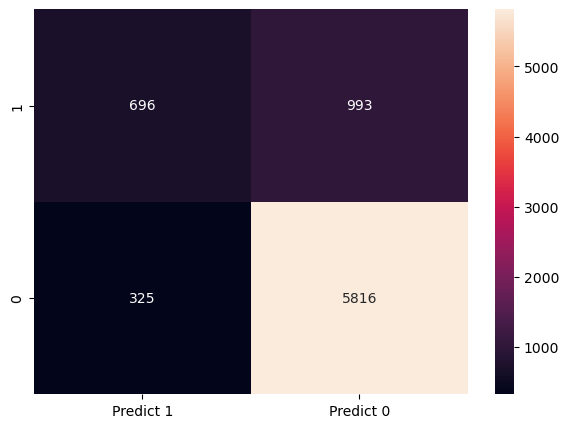

In [268]:
cm=metrics.confusion_matrix(Ytest,predictions,labels=[1,0])
data_cm=pd.DataFrame(cm, index=[i for i in ["1","0"]],
                    columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(data_cm,annot=True,fmt='g')

In [269]:
from sklearn.tree import DecisionTreeRegressor

In [270]:
model2=DecisionTreeRegressor(max_depth=6)

In [271]:
model2.fit(Xtrain,Ytrain)

DecisionTreeRegressor(max_depth=6)

In [272]:
model2.score(Xtrain,Ytrain)

0.35852637769952

In [273]:
model2.score(Xtest,Ytest)

0.31010333567032455